In [ ]:
import time
start_time = round(time.time()*1000)
print("Operations Start Time:",start_time)

Operations Start Time: 1668349177513


# **Feature Selection Methods with Instance Hardness Threshold Resampling Technique**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/heartstroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Preprocessing**

In [ ]:
df.drop(['id'],axis = 1,inplace = True)

**Filling NULL Values**

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
print(round(df['bmi'].mean(),1))

28.9


In [ ]:
df['bmi'].fillna(28.9,inplace = True)

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Conversion of Categorical data into Numerical data**

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,Rural,202.21,28.9,never smoked,1
2,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [ ]:
df['Residence_type'].value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,1,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.9,2,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,2,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,3,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,2,1


In [ ]:
df['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [ ]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.9,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
df['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

**One Hot Encoding**

df1 = pd.get_dummies(df,columns = ['work_type','smoking_status'])

df1.head()

In [ ]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

**Scaling of the dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
data = df.drop(['stroke'],axis = 1)
data.shape

(5110, 10)

In [ ]:
columns = ['gender','age','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type','avg_glucose_level',
           'bmi','smoking_status']

In [ ]:
X = pd.DataFrame(scaler.fit_transform(data),columns = columns)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.188073,1.051434,-0.328602,4.185032,0.723884,-0.153836,0.984080,2.706375,1.001199,-0.351781
1,-0.840344,0.786070,-0.328602,-0.238947,0.723884,0.763438,-1.016178,2.121559,0.000844,0.581552
2,1.188073,1.626390,-0.328602,4.185032,0.723884,-0.153836,-1.016178,-0.005028,0.468543,0.581552
3,-0.840344,0.255342,-0.328602,-0.238947,0.723884,-0.153836,0.984080,1.437358,0.715384,1.514885
4,-0.840344,1.582163,3.043196,-0.238947,0.723884,0.763438,-1.016178,1.501184,-0.635746,0.581552


In [ ]:
y = df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# **Instance Hardness Threshold - Resampling Technique**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold

iht = InstanceHardnessThreshold(random_state = 0)
x_instance, y_iht = iht.fit_resample(X,y)

In [ ]:
len(x_instance)

2384

In [ ]:
x_instance

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.188073,-1.779117,-0.328602,-0.238947,-1.381436,1.680712,-1.016178,-0.243549,-1.415243,-1.285114
1,-0.840344,-1.557980,-0.328602,-0.238947,-1.381436,-0.153836,0.984080,0.104735,-1.467210,-1.285114
2,1.188073,-1.292616,-0.328602,-0.238947,-1.381436,-1.071110,-1.016178,1.217610,-1.272335,-1.285114
3,-0.840344,0.388024,-0.328602,-0.238947,0.723884,-0.153836,0.984080,-0.630703,-1.454218,-0.351781
4,-0.840344,-0.142705,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,-0.245316,1.754714,0.581552
...,...,...,...,...,...,...,...,...,...,...
2379,1.188073,0.609161,-0.328602,-0.238947,0.723884,-0.153836,-1.016178,-0.467935,1.014191,-1.285114
2380,-0.840344,-1.292616,-0.328602,-0.238947,-1.381436,1.680712,-1.016178,-1.064899,0.260677,-1.285114
2381,-0.840344,1.405253,-0.328602,-0.238947,0.723884,0.763438,-1.016178,-0.603980,0.052811,-0.351781
2382,1.188073,1.228344,3.043196,-0.238947,0.723884,0.763438,-1.016178,-0.405213,0.000844,-1.285114


In [ ]:
x_instance = x_instance.to_numpy()

In [ ]:
len(y_iht)

2384

In [ ]:
from collections import Counter

In [ ]:
print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_iht))

Original dataset shape: Counter({0: 4861, 1: 249})
Resample dataset shape: Counter({0: 2135, 1: 249})


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
def measure(model,X, Y):
  from sklearn.metrics import make_scorer

  accuracy = cross_val_score(model, X, Y, scoring ='accuracy', cv = 10)
  precision = cross_val_score(model, X, Y, scoring = 'precision', cv = 10)
  recall = cross_val_score(model, X, Y, scoring = 'recall', cv = 10)
  F1 = cross_val_score(model, X, Y, scoring = 'f1', cv = 10)

  sol = []
  sol.append(accuracy.mean())
  sol.append(precision.mean())
  sol.append(recall.mean())
  sol.append(F1.mean())

  return sol

# **Comparative Analysis of Feature Selection Methods**

# **Information Gain**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
imp = mutual_info_classif(x_instance, y_iht)

In [ ]:
imp

array([0.00058697, 0.23975873, 0.0475377 , 0.04211556, 0.05021428,
       0.05381586, 0.        , 0.05882469, 0.04537531, 0.02658272])

In [ ]:
index = [0,1,2,3,4,5,6,7,8,9]

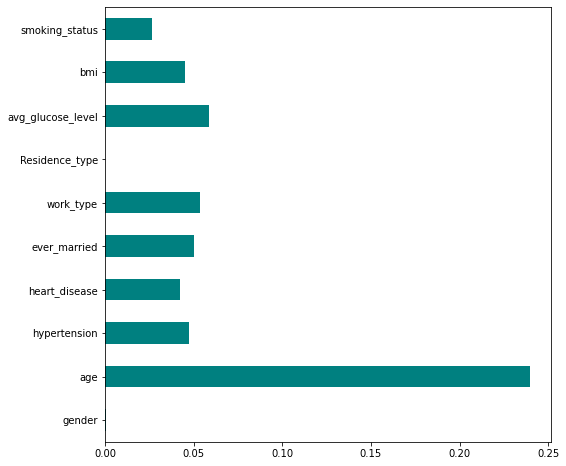

In [ ]:
plt.figure(figsize = (8,8))

feature_imp = pd.Series(imp, df.columns[0:len(df.columns)-1])

feature_imp.plot(kind = 'barh', color = 'teal')
plt.show()

In [ ]:
feature_imp

gender               0.000587
age                  0.239759
hypertension         0.047538
heart_disease        0.042116
ever_married         0.050214
work_type            0.053816
Residence_type       0.000000
avg_glucose_level    0.058825
bmi                  0.045375
smoking_status       0.026583
dtype: float64

In [ ]:
feature_imp.sort_values(ascending=True)

Residence_type       0.000000
gender               0.000587
smoking_status       0.026583
heart_disease        0.042116
bmi                  0.045375
hypertension         0.047538
ever_married         0.050214
work_type            0.053816
avg_glucose_level    0.058825
age                  0.239759
dtype: float64

**Extracting 7 features from the 10 features availble which have most Information Gain**

Of all the above, Gender and Residence type have least Information Gain

So We remove them both from x_iht

In [ ]:
x_instance

array([[ 1.18807255e+00, -1.77911731e+00, -3.28601864e-01, ...,
        -2.43548790e-01, -1.41524339e+00, -1.28511375e+00],
       [-8.40343999e-01, -1.55798046e+00, -3.28601864e-01, ...,
         1.04735294e-01, -1.46720990e+00, -1.28511375e+00],
       [ 1.18807255e+00, -1.29261625e+00, -3.28601864e-01, ...,
         1.21761006e+00, -1.27233548e+00, -1.28511375e+00],
       ...,
       [-8.40343999e-01,  1.40525323e+00, -3.28601864e-01, ...,
        -6.03979751e-01,  5.28105869e-02, -3.51780710e-01],
       [ 1.18807255e+00,  1.22834376e+00,  3.04319637e+00, ...,
        -4.05212677e-01,  8.44074468e-04, -1.28511375e+00],
       [-8.40343999e-01,  1.53793534e+00, -3.28601864e-01, ...,
        -6.03758899e-01, -1.20737734e+00, -1.28511375e+00]])

In [ ]:
len(x_instance[0])

10

In [ ]:
for i in range(0,len(imp)-1):
  for j in range(0,len(imp)-i-1):
    if(imp[j] > imp[j+1]):
      imp[j],imp[j+1] = imp[j+1],imp[j]
      index[j], index[j+1] = index[j+1],index[j]

print(imp)
print(index)

[0.         0.00058697 0.02658272 0.04211556 0.04537531 0.0475377
 0.05021428 0.05381586 0.05882469 0.23975873]
[6, 0, 9, 3, 8, 2, 4, 5, 7, 1]


In [ ]:
miss = []
miss.append(index[0])
miss.append(index[1])
miss.append(index[2])

miss

[6, 0, 9]

In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[-1.77911731e+00, -3.28601864e-01, -2.38946800e-01, ...,
         1.68071161e+00, -2.43548790e-01, -1.41524339e+00],
       [-1.55798046e+00, -3.28601864e-01, -2.38946800e-01, ...,
        -1.53836361e-01,  1.04735294e-01, -1.46720990e+00],
       [-1.29261625e+00, -3.28601864e-01, -2.38946800e-01, ...,
        -1.07111035e+00,  1.21761006e+00, -1.27233548e+00],
       ...,
       [ 1.40525323e+00, -3.28601864e-01, -2.38946800e-01, ...,
         7.63437624e-01, -6.03979751e-01,  5.28105869e-02],
       [ 1.22834376e+00,  3.04319637e+00, -2.38946800e-01, ...,
         7.63437624e-01, -4.05212677e-01,  8.44074468e-04],
       [ 1.53793534e+00, -3.28601864e-01, -2.38946800e-01, ...,
        -1.53836361e-01, -6.03758899e-01, -1.20737734e+00]])

In [ ]:
len(x_iht[0])

7

**Information Gain Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_iht, y_iht)

print("Acuracy using Information Gain and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Information Gain and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Information Gain and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Information Gain and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using Information Gain and Logistic Regression is :  96.6017
Precision using Information Gain and Logistic Regression is :  89.1165
Recall using Information Gain and Logistic Regression is :  77.05
F1 Score using Information Gain and Logistic Regression is :  82.3746


**Information Gain using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_iht, y_iht)

print("Acuracy using Information Gain  and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Information Gain and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Information Gain and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Information Gain and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Information Gain  and Decision Tree is :  95.8461
Precision using Information Gain and Decision Tree is :  81.3115
Recall using Information Gain and Decision Tree is :  79.9167
F1 Score using Information Gain and Decision Tree is :  80.2514


**Information Gain using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_iht, y_iht)

print("Acuracy using Information Gain and SVM is : ",round(ans[0]*100,4))
print("Precision using Information Gain and SVM is : ",round(ans[1]*100,4))

print("Recall using Information Gain and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Information Gain and SVM is : ",round(ans[3]*100,4))

Acuracy using Information Gain and SVM is :  96.854
Precision using Information Gain and SVM is :  92.6008
Recall using Information Gain and SVM is :  75.8833
F1 Score using Information Gain and SVM is :  83.233


**Information Gain using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_iht, y_iht)

print("Acuracy using Information Gain and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Information Gain and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Information Gain and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Information Gain and Naive Bayes is : ",round(ans[3]*100,4))


Acuracy using Information Gain and Naive Bayes is :  94.044
Precision using Information Gain and Naive Bayes is :  79.1801
Recall using Information Gain and Naive Bayes is :  59.05
F1 Score using Information Gain and Naive Bayes is :  67.207


**Information Gain using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_iht, y_iht)

print("Acuracy using Information Gain and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Information Gain and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Information Gain and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Information Gain and Random Forest is : ",round(ans[3]*100,4))

Acuracy using Information Gain and Random Forest is :  97.8181
Precision using Information Gain and Random Forest is :  95.5295
Recall using Information Gain and Random Forest is :  83.1333
F1 Score using Information Gain and Random Forest is :  88.7285


**Information Gain using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_iht, y_iht)

print("Acuracy using Information Gain and KNN is : ",round(ans[0]*100,4))
print("Precision using Information Gain and KNN is : ",round(ans[1]*100,4))

print("Recall using Information Gain and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Information Gain and KNN is : ",round(ans[3]*100,4))

Acuracy using Information Gain and KNN is :  96.5181
Precision using Information Gain and KNN is :  90.2486
Recall using Information Gain and KNN is :  75.0667
F1 Score using Information Gain and KNN is :  81.602


# **Fisher's Score**

In [ ]:
pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.6 MB/s 


In [ ]:
from skfeature.function.similarity_based import fisher_score

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
ranks = fisher_score.fisher_score(x_instance, y_iht)

In [ ]:
ranks

array([8, 7, 6, 2, 5, 1, 4, 0, 3, 9])

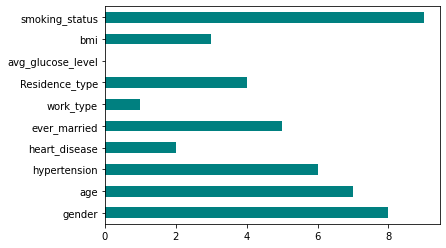

In [ ]:
features_importance = pd.Series(ranks, df.columns[0:len(df.columns)-1])

features_importance.plot(kind = 'barh', color = 'teal')
plt.show()

In [ ]:
features_importance

gender               8
age                  7
hypertension         6
heart_disease        2
ever_married         5
work_type            1
Residence_type       4
avg_glucose_level    0
bmi                  3
smoking_status       9
dtype: int64

Minimum Fisher's Score willbe removed - Avg_glucose Level, Work_type, Heart_disease

In [ ]:
x_instance

array([[ 1.18807255e+00, -1.77911731e+00, -3.28601864e-01, ...,
        -2.43548790e-01, -1.41524339e+00, -1.28511375e+00],
       [-8.40343999e-01, -1.55798046e+00, -3.28601864e-01, ...,
         1.04735294e-01, -1.46720990e+00, -1.28511375e+00],
       [ 1.18807255e+00, -1.29261625e+00, -3.28601864e-01, ...,
         1.21761006e+00, -1.27233548e+00, -1.28511375e+00],
       ...,
       [-8.40343999e-01,  1.40525323e+00, -3.28601864e-01, ...,
        -6.03979751e-01,  5.28105869e-02, -3.51780710e-01],
       [ 1.18807255e+00,  1.22834376e+00,  3.04319637e+00, ...,
        -4.05212677e-01,  8.44074468e-04, -1.28511375e+00],
       [-8.40343999e-01,  1.53793534e+00, -3.28601864e-01, ...,
        -6.03758899e-01, -1.20737734e+00, -1.28511375e+00]])

In [ ]:
len(x_instance[0])

10

In [ ]:
miss = []
for i in range(0,len(ranks)):
  if(ranks[i] == 0 or ranks[i] == 1 or ranks[i] == 2):
    miss.append(i)

In [ ]:
print(miss)

[3, 5, 7]


In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[ 1.18807255e+00, -1.77911731e+00, -3.28601864e-01, ...,
        -1.01617781e+00, -1.41524339e+00, -1.28511375e+00],
       [-8.40343999e-01, -1.55798046e+00, -3.28601864e-01, ...,
         9.84079744e-01, -1.46720990e+00, -1.28511375e+00],
       [ 1.18807255e+00, -1.29261625e+00, -3.28601864e-01, ...,
        -1.01617781e+00, -1.27233548e+00, -1.28511375e+00],
       ...,
       [-8.40343999e-01,  1.40525323e+00, -3.28601864e-01, ...,
        -1.01617781e+00,  5.28105869e-02, -3.51780710e-01],
       [ 1.18807255e+00,  1.22834376e+00,  3.04319637e+00, ...,
        -1.01617781e+00,  8.44074468e-04, -1.28511375e+00],
       [-8.40343999e-01,  1.53793534e+00, -3.28601864e-01, ...,
        -1.01617781e+00, -1.20737734e+00, -1.28511375e+00]])

In [ ]:
len(x_iht[0])

7

**Fisher Score using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_iht, y_iht)

print("Acuracy using Fisher Score and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Fisher Score and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Fisher Score and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Fisher Score and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using Fisher Score and Logistic Regression is :  96.0569
Precision using Fisher Score and Logistic Regression is :  87.1605
Recall using Fisher Score and Logistic Regression is :  73.4667
F1 Score using Fisher Score and Logistic Regression is :  79.3645


**Fisher Score using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_iht, y_iht)

print("Acuracy using Fisher Score  and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Fisher Score and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Fisher Score and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Fisher Score and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Fisher Score  and Decision Tree is :  95.7206
Precision using Fisher Score and Decision Tree is :  79.7253
Recall using Fisher Score and Decision Tree is :  79.9167
F1 Score using Fisher Score and Decision Tree is :  79.3657


**Fisher Score using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_iht, y_iht)

print("Acuracy using Fisher Score and SVM is : ",round(ans[0]*100,4))
print("Precision using Fisher Score and SVM is : ",round(ans[1]*100,4))

print("Recall using Fisher Score and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Fisher Score and SVM is : ",round(ans[3]*100,4))

Acuracy using Fisher Score and SVM is :  95.5965
Precision using Fisher Score and SVM is :  86.9083
Recall using Fisher Score and SVM is :  68.6833
F1 Score using Fisher Score and SVM is :  76.2901


**Fisher Score using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_iht, y_iht)

print("Acuracy using Fisher Score and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Fisher Score and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Fisher Score and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Fisher Score and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Fisher Score and Naive Bayes is :  95.0503
Precision using Fisher Score and Naive Bayes is :  77.4858
Recall using Fisher Score and Naive Bayes is :  75.8833
F1 Score using Fisher Score and Naive Bayes is :  76.2029


**Fisher Score using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_iht, y_iht)

print("Acuracy using Fisher Score and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Fisher Score and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Fisher Score and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Fisher Score and Random Forest is : ",round(ans[3]*100,4))

Acuracy using Fisher Score and Random Forest is :  97.1889
Precision using Fisher Score and Random Forest is :  91.8115
Recall using Fisher Score and Random Forest is :  80.3333
F1 Score using Fisher Score and Random Forest is :  85.5426


**Fisher Score using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_iht, y_iht)

print("Acuracy using Fisher Score and KNN is : ",round(ans[0]*100,4))
print("Precision using Fisher Score and KNN is : ",round(ans[1]*100,4))

print("Recall using Fisher Score and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Fisher Score and KNN is : ",round(ans[3]*100,4))

Acuracy using Fisher Score and KNN is :  95.093
Precision using Fisher Score and KNN is :  83.8579
Recall using Fisher Score and KNN is :  66.3167
F1 Score using Fisher Score and KNN is :  73.4608


# **Variance Threshold**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
v_threshold = VarianceThreshold(threshold = 0.6)

In [ ]:
v_threshold.fit(x_instance)

VarianceThreshold(threshold=0.6)

In [ ]:
v_threshold.get_support()

array([ True,  True, False, False,  True,  True,  True, False,  True,
        True])

**Removes those columns whose variance doesn't cross the threshold value**

Hyper Tension, Heart Disease and Avg_glucose_level doesn't satisfy this

In [ ]:
len(x_instance[0])

10

In [ ]:
miss = []
for i in range(0,len(v_threshold.get_support())):
  if(v_threshold.get_support()[i] == False):
    miss.append(i)
  #print(v_threshold.get_support()[i])

In [ ]:
miss

[2, 3, 7]

In [ ]:
x_iht = np.delete(x_instance,miss , axis = 1)
x_iht

array([[ 1.18807255e+00, -1.77911731e+00, -1.38143640e+00, ...,
        -1.01617781e+00, -1.41524339e+00, -1.28511375e+00],
       [-8.40343999e-01, -1.55798046e+00, -1.38143640e+00, ...,
         9.84079744e-01, -1.46720990e+00, -1.28511375e+00],
       [ 1.18807255e+00, -1.29261625e+00, -1.38143640e+00, ...,
        -1.01617781e+00, -1.27233548e+00, -1.28511375e+00],
       ...,
       [-8.40343999e-01,  1.40525323e+00,  7.23884211e-01, ...,
        -1.01617781e+00,  5.28105869e-02, -3.51780710e-01],
       [ 1.18807255e+00,  1.22834376e+00,  7.23884211e-01, ...,
        -1.01617781e+00,  8.44074468e-04, -1.28511375e+00],
       [-8.40343999e-01,  1.53793534e+00,  7.23884211e-01, ...,
        -1.01617781e+00, -1.20737734e+00, -1.28511375e+00]])

In [ ]:
len(x_iht[0])

7

**Variance Threshold using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_iht, y_iht)

print("Acuracy using Variance Threshold and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Variance Threshold and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Variance Threshold and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Variance Threshold and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using Variance Threshold and Logistic Regression is :  95.4697
Precision using Variance Threshold and Logistic Regression is :  84.0121
Recall using Variance Threshold and Logistic Regression is :  70.6333
F1 Score using Variance Threshold and Logistic Regression is :  76.3658


**Variance Threshold using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_iht, y_iht)

print("Acuracy using Variance Threshold  and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Variance Threshold and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Variance Threshold and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Variance Threshold and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Variance Threshold  and Decision Tree is :  95.6373
Precision using Variance Threshold and Decision Tree is :  78.0808
Recall using Variance Threshold and Decision Tree is :  79.55
F1 Score using Variance Threshold and Decision Tree is :  78.0238


**Variance Threshold using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_iht, y_iht)

print("Acuracy using Variance Threshold and SVM is : ",round(ans[0]*100,4))
print("Precision using Variance Threshold and SVM is : ",round(ans[1]*100,4))

print("Recall using Variance Threshold and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Variance Threshold and SVM is : ",round(ans[3]*100,4))

Acuracy using Variance Threshold and SVM is :  95.8474
Precision using Variance Threshold and SVM is :  89.6971
Recall using Variance Threshold and SVM is :  68.2333
F1 Score using Variance Threshold and SVM is :  77.1006


**Variance Threshold using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_iht, y_iht)

print("Acuracy using Variance Threshold and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Variance Threshold and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Variance Threshold and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Variance Threshold and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Variance Threshold and Naive Bayes is :  92.2406
Precision using Variance Threshold and Naive Bayes is :  59.3016
Recall using Variance Threshold and Naive Bayes is :  86.7333
F1 Score using Variance Threshold and Naive Bayes is :  70.2541


**Variance Threshold using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_iht, y_iht)

print("Acuracy using Variance Threshold and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Variance Threshold and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Variance Threshold and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Variance Threshold and Random Forest is : ",round(ans[3]*100,4))

Acuracy using Variance Threshold and Random Forest is :  96.9794
Precision using Variance Threshold and Random Forest is :  93.3602
Recall using Variance Threshold and Random Forest is :  76.6833
F1 Score using Variance Threshold and Random Forest is :  84.0239


**Variance Threshold using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_iht, y_iht)

print("Acuracy using Variance Threshold and KNN is : ",round(ans[0]*100,4))
print("Precision using Variance Threshold and KNN is : ",round(ans[1]*100,4))

print("Recall using Variance Threshold and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Variance Threshold and KNN is : ",round(ans[3]*100,4))

Acuracy using Variance Threshold and KNN is :  95.1343
Precision using Variance Threshold and KNN is :  89.7046
Recall using Variance Threshold and KNN is :  60.6
F1 Score using Variance Threshold and KNN is :  71.9647


# **Forward Feature Selection**

**Forward Feature Selection using Logistic Regression**

In [ ]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(random_state = 0)
sfs1 = sfs(log, k_features=7, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2022-11-13 14:26:15] Features: 1/7 -- score: -0.04949791237249617[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2022-11-13 14:26:15] Features: 2/7 -- score: -0.037330655532653315[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s finished

[2022-11-13 14:26:16] Features: 3/7 -- score: -0.03355707062699294[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['0', '1', '2', '3', '5', '7', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[0, 1, 2, 3, 5, 7, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

In [ ]:
miss

[4, 6, 8]

In [ ]:
len(x_instance[0])

10

In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[ 1.18807255, -1.77911731, -0.32860186, ...,  1.68071161,
        -0.24354879, -1.28511375],
       [-0.840344  , -1.55798046, -0.32860186, ..., -0.15383636,
         0.10473529, -1.28511375],
       [ 1.18807255, -1.29261625, -0.32860186, ..., -1.07111035,
         1.21761006, -1.28511375],
       ...,
       [-0.840344  ,  1.40525323, -0.32860186, ...,  0.76343762,
        -0.60397975, -0.35178071],
       [ 1.18807255,  1.22834376,  3.04319637, ...,  0.76343762,
        -0.40521268, -1.28511375],
       [-0.840344  ,  1.53793534, -0.32860186, ..., -0.15383636,
        -0.6037589 , -1.28511375]])

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_iht, y_iht)

print("Acuracy using Forward Feature Selection and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Forward Feature Selection and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Forward Feature Selection and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Forward Feature Selection and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using Forward Feature Selection and Logistic Regression is :  96.6858
Precision using Forward Feature Selection and Logistic Regression is :  89.3212
Recall using Forward Feature Selection and Logistic Regression is :  77.85
F1 Score using Forward Feature Selection and Logistic Regression is :  82.8478


**Feature Selection using Decision Tree**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
sfs1 = sfs(clf, k_features=7, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-11-13 14:26:18] Features: 1/7 -- score: -0.03984814051406726[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-11-13 14:26:18] Features: 2/7 -- score: -0.035654387541179985[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-11-13 14:26:18] Features: 3/7 -- score: -0.03355795148247979[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['0', '1', '2', '3', '4', '5', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[0, 1, 2, 3, 4, 5, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[6, 7, 8]

In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[ 1.18807255, -1.77911731, -0.32860186, ..., -1.3814364 ,
         1.68071161, -1.28511375],
       [-0.840344  , -1.55798046, -0.32860186, ..., -1.3814364 ,
        -0.15383636, -1.28511375],
       [ 1.18807255, -1.29261625, -0.32860186, ..., -1.3814364 ,
        -1.07111035, -1.28511375],
       ...,
       [-0.840344  ,  1.40525323, -0.32860186, ...,  0.72388421,
         0.76343762, -0.35178071],
       [ 1.18807255,  1.22834376,  3.04319637, ...,  0.72388421,
         0.76343762, -1.28511375],
       [-0.840344  ,  1.53793534, -0.32860186, ...,  0.72388421,
        -0.15383636, -1.28511375]])

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_iht, y_iht)

print("Acuracy using Forward Feature Selection  and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Forward Feature Selection and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Forward Feature Selection and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Forward Feature Selection and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Forward Feature Selection  and Decision Tree is :  96.2679
Precision using Forward Feature Selection and Decision Tree is :  84.0043
Recall using Forward Feature Selection and Decision Tree is :  78.7333
F1 Score using Forward Feature Selection and Decision Tree is :  81.5033


**Forward Feature Selection using SVM**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm

In [ ]:
cl = svm.SVC()
sfs1 = sfs(cl, k_features=7, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished

[2022-11-13 14:26:21] Features: 1/7 -- score: -0.04362612969716188[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.3s finished

[2022-11-13 14:26:22] Features: 2/7 -- score: -0.033138664270739734[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s finished

[2022-11-13 14:26:24] Features: 3/7 -- score: -0.03187904092454592[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['1', '2', '3', '5', '6', '7', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[1, 2, 3, 5, 6, 7, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[0, 4, 8]

In [ ]:
x_iht = np.delete(x_instance,miss, axis = 1)
x_iht

array([[-1.77911731, -0.32860186, -0.2389468 , ..., -1.01617781,
        -0.24354879, -1.28511375],
       [-1.55798046, -0.32860186, -0.2389468 , ...,  0.98407974,
         0.10473529, -1.28511375],
       [-1.29261625, -0.32860186, -0.2389468 , ..., -1.01617781,
         1.21761006, -1.28511375],
       ...,
       [ 1.40525323, -0.32860186, -0.2389468 , ..., -1.01617781,
        -0.60397975, -0.35178071],
       [ 1.22834376,  3.04319637, -0.2389468 , ..., -1.01617781,
        -0.40521268, -1.28511375],
       [ 1.53793534, -0.32860186, -0.2389468 , ..., -1.01617781,
        -0.6037589 , -1.28511375]])

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_iht, y_iht)

print("Acuracy using Forward Feature Selection and SVM is : ",round(ans[0]*100,4))
print("Precision using Forward Feature Selection and SVM is : ",round(ans[1]*100,4))

print("Recall using Forward Feature Selection and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Forward Feature Selection and SVM is : ",round(ans[3]*100,4))

Acuracy using Forward Feature Selection and SVM is :  96.938
Precision using Forward Feature Selection and SVM is :  92.6927
Recall using Forward Feature Selection and SVM is :  76.6833
F1 Score using Forward Feature Selection and SVM is :  83.6629


**Forward Feature Selection using Naive Bayes**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
sfs1 = sfs(gnb, k_features=7, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-11-13 14:26:29] Features: 1/7 -- score: -0.04740059545830912[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-11-13 14:26:29] Features: 2/7 -- score: -0.04362436798618819[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-11-13 14:26:29] Features: 3/7 -- score: -0.04362436798618819[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['0', '1', '2', '5', '6', '7', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[0, 1, 2, 5, 6, 7, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[3, 4, 8]

In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[ 1.18807255, -1.77911731, -0.32860186, ..., -1.01617781,
        -0.24354879, -1.28511375],
       [-0.840344  , -1.55798046, -0.32860186, ...,  0.98407974,
         0.10473529, -1.28511375],
       [ 1.18807255, -1.29261625, -0.32860186, ..., -1.01617781,
         1.21761006, -1.28511375],
       ...,
       [-0.840344  ,  1.40525323, -0.32860186, ..., -1.01617781,
        -0.60397975, -0.35178071],
       [ 1.18807255,  1.22834376,  3.04319637, ..., -1.01617781,
        -0.40521268, -1.28511375],
       [-0.840344  ,  1.53793534, -0.32860186, ..., -1.01617781,
        -0.6037589 , -1.28511375]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_iht, y_iht)

print("Acuracy using Forward Feature Selection and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Forward Feature Selection and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Forward Feature Selection and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Forward Feature Selection and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Forward Feature Selection and Naive Bayes is :  95.2612
Precision using Forward Feature Selection and Naive Bayes is :  81.4481
Recall using Forward Feature Selection and Naive Bayes is :  71.0667
F1 Score using Forward Feature Selection and Naive Bayes is :  75.5237


**Forward Feature Selection using Random Forest**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
sfs1 = sfs(rf, k_features=7, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.8s finished

[2022-11-13 14:26:40] Features: 1/7 -- score: -0.04194457657276747[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.1s finished

[2022-11-13 14:26:49] Features: 2/7 -- score: -0.029781724010358862[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.5s finished

[2022-11-13 14:26:58] Features: 3/7 -- score: -0.024333632824198863[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['0', '1', '2', '3', '7', '8', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[0, 1, 2, 3, 7, 8, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[4, 5, 6]

In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[ 1.18807255e+00, -1.77911731e+00, -3.28601864e-01, ...,
        -2.43548790e-01, -1.41524339e+00, -1.28511375e+00],
       [-8.40343999e-01, -1.55798046e+00, -3.28601864e-01, ...,
         1.04735294e-01, -1.46720990e+00, -1.28511375e+00],
       [ 1.18807255e+00, -1.29261625e+00, -3.28601864e-01, ...,
         1.21761006e+00, -1.27233548e+00, -1.28511375e+00],
       ...,
       [-8.40343999e-01,  1.40525323e+00, -3.28601864e-01, ...,
        -6.03979751e-01,  5.28105869e-02, -3.51780710e-01],
       [ 1.18807255e+00,  1.22834376e+00,  3.04319637e+00, ...,
        -4.05212677e-01,  8.44074468e-04, -1.28511375e+00],
       [-8.40343999e-01,  1.53793534e+00, -3.28601864e-01, ...,
        -6.03758899e-01, -1.20737734e+00, -1.28511375e+00]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_iht, y_iht)

print("Acuracy using Forward Feature Selection and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Forward Feature Selection and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Forward Feature Selection and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Forward Feature Selection and Random Forest is : ",round(ans[3]*100,4))

Acuracy using Forward Feature Selection and Random Forest is :  97.7343
Precision using Forward Feature Selection and Random Forest is :  95.7815
Recall using Forward Feature Selection and Random Forest is :  81.9
F1 Score using Forward Feature Selection and Random Forest is :  88.2064


**Forward Feature Selection using KNN**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
sfs1 = sfs(knn, k_features=7, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished

[2022-11-13 14:27:39] Features: 1/7 -- score: -0.03859027887884713[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s finished

[2022-11-13 14:27:40] Features: 2/7 -- score: -0.03271673449253916[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s finished

[2022-11-13 14:27:41] Features: 3/7 -- score: -0.03145887285731903[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['1', '2', '3', '4', '7', '8', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[1, 2, 3, 4, 7, 8, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[0, 5, 6]

In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[-1.77911731e+00, -3.28601864e-01, -2.38946800e-01, ...,
        -2.43548790e-01, -1.41524339e+00, -1.28511375e+00],
       [-1.55798046e+00, -3.28601864e-01, -2.38946800e-01, ...,
         1.04735294e-01, -1.46720990e+00, -1.28511375e+00],
       [-1.29261625e+00, -3.28601864e-01, -2.38946800e-01, ...,
         1.21761006e+00, -1.27233548e+00, -1.28511375e+00],
       ...,
       [ 1.40525323e+00, -3.28601864e-01, -2.38946800e-01, ...,
        -6.03979751e-01,  5.28105869e-02, -3.51780710e-01],
       [ 1.22834376e+00,  3.04319637e+00, -2.38946800e-01, ...,
        -4.05212677e-01,  8.44074468e-04, -1.28511375e+00],
       [ 1.53793534e+00, -3.28601864e-01, -2.38946800e-01, ...,
        -6.03758899e-01, -1.20737734e+00, -1.28511375e+00]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_iht, y_iht)

print("Acuracy using Forward Feature Selection and KNN is : ",round(ans[0]*100,4))
print("Precision using Forward Feature Selection and KNN is : ",round(ans[1]*100,4))

print("Recall using Forward Feature Selection and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Forward Feature Selection and KNN is : ",round(ans[3]*100,4))

Acuracy using Forward Feature Selection and KNN is :  96.6445
Precision using Forward Feature Selection and KNN is :  88.8718
Recall using Forward Feature Selection and KNN is :  77.9
F1 Score using Forward Feature Selection and KNN is :  82.7767


# **Backward Feature Elimination**

**Backward Feature Elimination using Logistic Regression**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
sfs1 = sfs(log, k_features=7, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [ ]:
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished
Features: 9/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s finished
Features: 8/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s finished
Features: 7/7

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['0', '1', '2', '3', '4', '5', '7']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[0, 1, 2, 3, 4, 5, 7]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)
miss

[6, 8, 9]

In [ ]:
x_iht = np.delete(x_instance, [5, 8, 9], axis = 1)
x_iht

array([[ 1.18807255, -1.77911731, -0.32860186, ..., -1.3814364 ,
        -1.01617781, -0.24354879],
       [-0.840344  , -1.55798046, -0.32860186, ..., -1.3814364 ,
         0.98407974,  0.10473529],
       [ 1.18807255, -1.29261625, -0.32860186, ..., -1.3814364 ,
        -1.01617781,  1.21761006],
       ...,
       [-0.840344  ,  1.40525323, -0.32860186, ...,  0.72388421,
        -1.01617781, -0.60397975],
       [ 1.18807255,  1.22834376,  3.04319637, ...,  0.72388421,
        -1.01617781, -0.40521268],
       [-0.840344  ,  1.53793534, -0.32860186, ...,  0.72388421,
        -1.01617781, -0.6037589 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_iht, y_iht)

print("Acuracy using Backward Feature Elimination and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Backward Feature Elimination and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Backward Feature Elimination and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Backward Feature Elimination and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using Backward Feature Elimination and Logistic Regression is :  96.6438
Precision using Backward Feature Elimination and Logistic Regression is :  89.5117
Recall using Backward Feature Elimination and Logistic Regression is :  77.05
F1 Score using Backward Feature Elimination and Logistic Regression is :  82.5519


**Backward Feature Elimination using Decision Tree**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
sfs1 = sfs(clf, k_features=7, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
Features: 9/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished
Features: 8/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
Features: 7/7

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['1', '3', '4', '5', '7', '8', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[1, 3, 4, 5, 7, 8, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[0, 2, 6]

In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[-1.77911731e+00, -2.38946800e-01, -1.38143640e+00, ...,
        -2.43548790e-01, -1.41524339e+00, -1.28511375e+00],
       [-1.55798046e+00, -2.38946800e-01, -1.38143640e+00, ...,
         1.04735294e-01, -1.46720990e+00, -1.28511375e+00],
       [-1.29261625e+00, -2.38946800e-01, -1.38143640e+00, ...,
         1.21761006e+00, -1.27233548e+00, -1.28511375e+00],
       ...,
       [ 1.40525323e+00, -2.38946800e-01,  7.23884211e-01, ...,
        -6.03979751e-01,  5.28105869e-02, -3.51780710e-01],
       [ 1.22834376e+00, -2.38946800e-01,  7.23884211e-01, ...,
        -4.05212677e-01,  8.44074468e-04, -1.28511375e+00],
       [ 1.53793534e+00, -2.38946800e-01,  7.23884211e-01, ...,
        -6.03758899e-01, -1.20737734e+00, -1.28511375e+00]])

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_iht, y_iht)

print("Acuracy using Backward Feature Elimination  and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Backward Feature Elimination and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Backward Feature Elimination and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Backward Feature Elimination and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using Backward Feature Elimination  and Decision Tree is :  96.1401
Precision using Backward Feature Elimination and Decision Tree is :  81.5459
Recall using Backward Feature Elimination and Decision Tree is :  79.5
F1 Score using Backward Feature Elimination and Decision Tree is :  80.3773


**Backward Elimination using SVM**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm
cl = svm.SVC()

In [ ]:
sfs1 = sfs(cl, k_features=7, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished
Features: 9/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.8s finished
Features: 8/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s finished
Features: 7/7

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['1', '2', '3', '5', '6', '7', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[1, 2, 3, 5, 6, 7, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[0, 4, 8]

In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[-1.77911731, -0.32860186, -0.2389468 , ..., -1.01617781,
        -0.24354879, -1.28511375],
       [-1.55798046, -0.32860186, -0.2389468 , ...,  0.98407974,
         0.10473529, -1.28511375],
       [-1.29261625, -0.32860186, -0.2389468 , ..., -1.01617781,
         1.21761006, -1.28511375],
       ...,
       [ 1.40525323, -0.32860186, -0.2389468 , ..., -1.01617781,
        -0.60397975, -0.35178071],
       [ 1.22834376,  3.04319637, -0.2389468 , ..., -1.01617781,
        -0.40521268, -1.28511375],
       [ 1.53793534, -0.32860186, -0.2389468 , ..., -1.01617781,
        -0.6037589 , -1.28511375]])

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_iht, y_iht)

print("Acuracy using Backward Feature Elimination and SVM is : ",round(ans[0]*100,4))
print("Precision using Backward Feature Elimination and SVM is : ",round(ans[1]*100,4))

print("Recall using Backward Feature Elimination and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Backward Feature Elimination and SVM is : ",round(ans[3]*100,4))

Acuracy using Backward Feature Elimination and SVM is :  96.938
Precision using Backward Feature Elimination and SVM is :  92.6927
Recall using Backward Feature Elimination and SVM is :  76.6833
F1 Score using Backward Feature Elimination and SVM is :  83.6629


**Backward Feature Elimination using Naive Bayes**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
sfs1 = sfs(gnb, k_features=7, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
Features: 9/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished
Features: 8/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 7/7

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['0', '1', '3', '4', '6', '7', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[0, 1, 3, 4, 6, 7, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[2, 5, 8]

In [ ]:
x_iht = np.delete(x_instance, [2,8,9], axis = 1)
x_iht

array([[ 1.18807255, -1.77911731, -0.2389468 , ...,  1.68071161,
        -1.01617781, -0.24354879],
       [-0.840344  , -1.55798046, -0.2389468 , ..., -0.15383636,
         0.98407974,  0.10473529],
       [ 1.18807255, -1.29261625, -0.2389468 , ..., -1.07111035,
        -1.01617781,  1.21761006],
       ...,
       [-0.840344  ,  1.40525323, -0.2389468 , ...,  0.76343762,
        -1.01617781, -0.60397975],
       [ 1.18807255,  1.22834376, -0.2389468 , ...,  0.76343762,
        -1.01617781, -0.40521268],
       [-0.840344  ,  1.53793534, -0.2389468 , ..., -0.15383636,
        -1.01617781, -0.6037589 ]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_iht, y_iht)

print("Acuracy using Backward Feature Elimination and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Backward Feature Elimination and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Backward Feature Elimination and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Backward Feature Elimination and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using Backward Feature Elimination and Naive Bayes is :  95.5961
Precision using Backward Feature Elimination and Naive Bayes is :  87.2025
Recall using Backward Feature Elimination and Naive Bayes is :  67.85
F1 Score using Backward Feature Elimination and Naive Bayes is :  76.0034


**Backward Feature Eliminaion using Random Forest**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
sfs1 = sfs(rf, k_features=7, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   13.7s finished
Features: 9/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.7s finished
Features: 8/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.6s finished
Features: 7/7

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['0', '1', '2', '3', '7', '8', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[0, 1, 2, 3, 7, 8, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[4, 5, 6]

In [ ]:
x_iht = np.delete(x_instance, miss, axis = 1)
x_iht

array([[ 1.18807255e+00, -1.77911731e+00, -3.28601864e-01, ...,
        -2.43548790e-01, -1.41524339e+00, -1.28511375e+00],
       [-8.40343999e-01, -1.55798046e+00, -3.28601864e-01, ...,
         1.04735294e-01, -1.46720990e+00, -1.28511375e+00],
       [ 1.18807255e+00, -1.29261625e+00, -3.28601864e-01, ...,
         1.21761006e+00, -1.27233548e+00, -1.28511375e+00],
       ...,
       [-8.40343999e-01,  1.40525323e+00, -3.28601864e-01, ...,
        -6.03979751e-01,  5.28105869e-02, -3.51780710e-01],
       [ 1.18807255e+00,  1.22834376e+00,  3.04319637e+00, ...,
        -4.05212677e-01,  8.44074468e-04, -1.28511375e+00],
       [-8.40343999e-01,  1.53793534e+00, -3.28601864e-01, ...,
        -6.03758899e-01, -1.20737734e+00, -1.28511375e+00]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_iht, y_iht)

print("Acuracy using Backward Feature Elimination and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Backward Feature Elimination and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Backward Feature Elimination and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Backward Feature Elimination and Random Forest is : ",round(ans[3]*100,4))

Acuracy using Backward Feature Elimination and Random Forest is :  97.7343
Precision using Backward Feature Elimination and Random Forest is :  95.7815
Recall using Backward Feature Elimination and Random Forest is :  81.9
F1 Score using Backward Feature Elimination and Random Forest is :  88.2064


**Backward Feature Elimination using KNN**

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
sfs1 = sfs(knn, k_features=7, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(x_instance, y_iht)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
Features: 9/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s finished
Features: 8/7[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s finished
Features: 7/7

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['1', '2', '3', '4', '7', '8', '9']


In [ ]:
for i in range(0,len(feat_names)):
  feat_names[i] = int(feat_names[i])
feat_names

[1, 2, 3, 4, 7, 8, 9]

In [ ]:
miss = []
actual = [0,1,2,3,4,5,6,7,8,9]
for i in range(0,len(actual)):
  if(actual[i] not in feat_names):
    miss.append(i)

miss

[0, 5, 6]

In [ ]:
x_iht = np.delete(x_instance, [4,5,6], axis = 1)
x_iht

array([[ 1.18807255e+00, -1.77911731e+00, -3.28601864e-01, ...,
        -2.43548790e-01, -1.41524339e+00, -1.28511375e+00],
       [-8.40343999e-01, -1.55798046e+00, -3.28601864e-01, ...,
         1.04735294e-01, -1.46720990e+00, -1.28511375e+00],
       [ 1.18807255e+00, -1.29261625e+00, -3.28601864e-01, ...,
         1.21761006e+00, -1.27233548e+00, -1.28511375e+00],
       ...,
       [-8.40343999e-01,  1.40525323e+00, -3.28601864e-01, ...,
        -6.03979751e-01,  5.28105869e-02, -3.51780710e-01],
       [ 1.18807255e+00,  1.22834376e+00,  3.04319637e+00, ...,
        -4.05212677e-01,  8.44074468e-04, -1.28511375e+00],
       [-8.40343999e-01,  1.53793534e+00, -3.28601864e-01, ...,
        -6.03758899e-01, -1.20737734e+00, -1.28511375e+00]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_iht, y_iht)

print("Acuracy using Backward Feature Elimination and KNN is : ",round(ans[0]*100,4))
print("Precision using Backward Feature Elimination and KNN is : ",round(ans[1]*100,4))

print("Recall using Backward Feature Elimination and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Backward Feature Elimination and KNN is : ",round(ans[3]*100,4))

Acuracy using Backward Feature Elimination and KNN is :  96.6861
Precision using Backward Feature Elimination and KNN is :  90.7267
Recall using Backward Feature Elimination and KNN is :  75.9
F1 Score using Backward Feature Elimination and KNN is :  82.4073


# **Exhaustive Feature Selection**

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

**Exhaustive Feature Selection using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
efs1 = EFS(log, min_features=7, max_features=7, scoring='accuracy', print_progress=True, cv=10)
efs2 = EFS(log, min_features=7, max_features=7, scoring='precision', print_progress=True, cv=10)
efs3 = EFS(log, min_features=7, max_features=7, scoring='recall', print_progress=True, cv=10)
efs4 = EFS(log, min_features=7, max_features=7, scoring='f1', print_progress=True, cv=10)

In [ ]:
efs1 = efs1.fit(x_instance, y_iht)
efs2 = efs2.fit(x_instance, y_iht)

efs3 = efs3.fit(x_instance, y_iht)
efs4 = efs4.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
print("Accuracy of Model with Exhaustive Feature Selection using Logistic Regression is:", round(efs1.best_score_*100,4))
print("Precision of Model with Exhaustive Feature Selection using Logistic Regression is:", round(efs2.best_score_*100,4))

print("Recall of Model with Exhaustive Feature Selection using Logistic Regression is:", round(efs3.best_score_*100,4))
print("F1 Score of Model with Exhaustive Feature Selection using Logistic Regression is:", round(efs4.best_score_*100,4))

Accuracy of Model with Exhaustive Feature Selection using Logistic Regression is: 96.7278
Precision of Model with Exhaustive Feature Selection using Logistic Regression is: 93.3333
Recall of Model with Exhaustive Feature Selection using Logistic Regression is: 78.25
F1 Score of Model with Exhaustive Feature Selection using Logistic Regression is: 83.079


In [ ]:
print(efs1.best_idx_)
print()

(0, 1, 2, 3, 4, 5, 7)



**Exhaustive Feature Selection using Decision Tree**

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
efs1 = EFS(clf, min_features=7, max_features=7, scoring='accuracy', print_progress=True, cv=10)
efs1 = efs1.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs2 = EFS(clf, min_features=7, max_features=7, scoring='precision', print_progress=True, cv=10)
efs2 = efs2.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs3 = EFS(clf, min_features=7, max_features=7, scoring='recall', print_progress=True, cv=10)
efs3 = efs3.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs4 = EFS(clf, min_features=7, max_features=7, scoring='f1', print_progress=True, cv=10)
efs4 = efs4.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
print("Accuracy of Model with Exhaustive Feature Selection using Decision Tree is:", round(efs1.best_score_*100,4))
print("Precision of Model with Exhaustive Feature Selection using Decision Tree is:", round(efs2.best_score_*100,4))

print("Recall of Model with Exhaustive Feature Selection using Decision Tree is:", round(efs3.best_score_*100,4))
print("F1 Score of Model with Exhaustive Feature Selection using Decision Tree is:", round(efs4.best_score_*100,4))

Accuracy of Model with Exhaustive Feature Selection using Decision Tree is: 96.2672
Precision of Model with Exhaustive Feature Selection using Decision Tree is: 85.0101
Recall of Model with Exhaustive Feature Selection using Decision Tree is: 82.3
F1 Score of Model with Exhaustive Feature Selection using Decision Tree is: 83.5299


In [ ]:
print(efs1.best_idx_)
print()

(0, 1, 2, 3, 4, 7, 9)



**Exhaustive Feature Selection using SVM**

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn import svm
cl = svm.SVC()

In [ ]:
efs1 = EFS(cl, min_features=7, max_features=7, scoring='accuracy', print_progress=True, cv=10)

efs1 = efs1.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs2 = EFS(cl, min_features=7, max_features=7, scoring='precision', print_progress=True, cv=10)

efs2 = efs2.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs3 = EFS(cl, min_features=7, max_features=7, scoring='recall', print_progress=True, cv=10)

efs3 = efs3.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs4 = EFS(cl, min_features=7, max_features=7, scoring='f1', print_progress=True, cv=10)

efs4 = efs4.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
print("Accuracy of Model with Exhaustive Feature Selection using SVM is:", round(efs1.best_score_*100,4))
print("Precision of Model with Exhaustive Feature Selection using SVM is:", round(efs2.best_score_*100,4))

print("Recall of Model with Exhaustive Feature Selection using SVM is:", round(efs3.best_score_*100,4))
print("F1 Score of Model with Exhaustive Feature Selection using SVM is:", round(efs4.best_score_*100,4))

Accuracy of Model with Exhaustive Feature Selection using SVM is: 96.9801
Precision of Model with Exhaustive Feature Selection using SVM is: 94.8489
Recall of Model with Exhaustive Feature Selection using SVM is: 77.0667
F1 Score of Model with Exhaustive Feature Selection using SVM is: 84.0217


In [ ]:
print(efs1.best_idx_)
print()

(1, 2, 3, 4, 6, 7, 8)



**Exhaustive Feature Selection using Naive Bayes**

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
efs1 = EFS(gnb, min_features=7, max_features=7, scoring='accuracy', print_progress=True, cv=10)
efs1 = efs1.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs2 = EFS(gnb, min_features=7, max_features=7, scoring='precision', print_progress=True, cv=10)
efs2 = efs2.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs3 = EFS(gnb, min_features=7, max_features=7, scoring='recall', print_progress=True, cv=10)
efs3 = efs3.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs4 = EFS(gnb, min_features=7, max_features=7, scoring='f1', print_progress=True, cv=10)
efs4 = efs4.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
print("Accuracy of Model with Exhaustive Feature Selection using Naive Bayes is:", round(efs1.best_score_*100,4))
print("Precision of Model with Exhaustive Feature Selection using Naive Bayes is:", round(efs2.best_score_*100,4))

print("Recall of Model with Exhaustive Feature Selection using Naive Bayes is:", round(efs3.best_score_*100,4))
print("F1 Score of Model with Exhaustive Feature Selection using Naive Bayes is:", round(efs4.best_score_*100,4))

Accuracy of Model with Exhaustive Feature Selection using Naive Bayes is: 95.5961
Precision of Model with Exhaustive Feature Selection using Naive Bayes is: 95.79
Recall of Model with Exhaustive Feature Selection using Naive Bayes is: 86.7333
F1 Score of Model with Exhaustive Feature Selection using Naive Bayes is: 78.1369


In [ ]:
print(efs1.best_idx_)
print()

(0, 1, 3, 4, 5, 6, 7)



**Exhaustive Feature Selection using Random Forest**

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
efs1 = EFS(rf, min_features=7, max_features=7, scoring='accuracy', print_progress=True, cv=10)
efs1 = efs1.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs2 = EFS(rf, min_features=7, max_features=7, scoring='precision', print_progress=True, cv=10)
efs2 = efs2.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs3 = EFS(rf, min_features=7, max_features=7, scoring='recall', print_progress=True, cv=10)
efs3 = efs3.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs4 = EFS(rf, min_features=7, max_features=7, scoring='f1', print_progress=True, cv=10)
efs4 = efs4.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
print("Accuracy of Model with Exhaustive Feature Selection using Random Forest is:", round(efs1.best_score_*100,4))
print("Precision of Model with Exhaustive Feature Selection using Random Forest is:", round(efs2.best_score_*100,4))

print("Recall of Model with Exhaustive Feature Selection using Random Forest is:", round(efs3.best_score_*100,4))
print("F1 Score of Model with Exhaustive Feature Selection using Random Forest is:", round(efs4.best_score_*100,4))

Accuracy of Model with Exhaustive Feature Selection using Random Forest is: 97.902
Precision of Model with Exhaustive Feature Selection using Random Forest is: 96.2735
Recall of Model with Exhaustive Feature Selection using Random Forest is: 83.5
F1 Score of Model with Exhaustive Feature Selection using Random Forest is: 89.1603


In [ ]:
print(efs1.best_idx_)
print()

(1, 2, 3, 5, 7, 8, 9)



**Exhaustive Feature Selection using KNN**

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
efs1 = EFS(knn, min_features=7, max_features=7, scoring='accuracy', print_progress=True, cv=10)
efs1 = efs1.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs2 = EFS(knn, min_features=7, max_features=7, scoring='precision', print_progress=True, cv=10)
efs2 = efs2.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs3 = EFS(knn, min_features=7, max_features=7, scoring='recall', print_progress=True, cv=10)
efs3 = efs3.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
efs4 = EFS(knn, min_features=7, max_features=7, scoring='f1', print_progress=True, cv=10)
efs4 = efs4.fit(x_instance, y_iht)

Features: 120/120

In [ ]:
print("Accuracy of Model with Exhaustive Feature Selection using KNN is:", round(efs1.best_score_*100,4))
print("Precision of Model with Exhaustive Feature Selection using KNN is:", round(efs2.best_score_*100,4))

print("Recall of Model with Exhaustive Feature Selection using KNN is:", round(efs3.best_score_*100,4))
print("F1 Score of Model with Exhaustive Feature Selection using KNN is:", round(efs4.best_score_*100,4))

Accuracy of Model with Exhaustive Feature Selection using KNN is: 96.6861
Precision of Model with Exhaustive Feature Selection using KNN is: 93.6464
Recall of Model with Exhaustive Feature Selection using KNN is: 77.9
F1 Score of Model with Exhaustive Feature Selection using KNN is: 82.7767


In [ ]:
print(efs1.best_idx_)
print()

(0, 1, 2, 3, 7, 8, 9)



# **Relief Algorithms**

In [ ]:
pip install ReliefF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.4 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6318 sha256=18e0cd11ad5438c6686e36628cabde2ddb2a1ad07fba6f398402090098556ee8
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


In [ ]:
from ReliefF import ReliefF

In [ ]:
fs = ReliefF(n_neighbors=1, n_features_to_keep=7)

In [ ]:
x_iht = fs.fit_transform(x_instance, y_iht)

In [ ]:
x_iht

array([[-0.2389468 , -0.32860186, -1.01617781, ...,  1.18807255,
         1.68071161, -1.28511375],
       [-0.2389468 , -0.32860186,  0.98407974, ..., -0.840344  ,
        -0.15383636, -1.28511375],
       [-0.2389468 , -0.32860186, -1.01617781, ...,  1.18807255,
        -1.07111035, -1.28511375],
       ...,
       [-0.2389468 , -0.32860186, -1.01617781, ..., -0.840344  ,
         0.76343762, -0.35178071],
       [-0.2389468 ,  3.04319637, -1.01617781, ...,  1.18807255,
         0.76343762, -1.28511375],
       [-0.2389468 , -0.32860186, -1.01617781, ..., -0.840344  ,
        -0.15383636, -1.28511375]])

In [ ]:
len(x_instance[0])

10

In [ ]:
len(x_iht[0])

7

In [ ]:
print(len(x_instance), len(x_iht), len(y_iht))

2384 2384 2384


**Relief Algorithms using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_iht, y_iht)

print("Acuracy using ReliefF Algorithm and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Relief Algorithm and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using ReliefF Algorithm and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using ReliefF Algorithm and Logistic Regression is : ",round(ans[3]*100,4))

Acuracy using ReliefF Algorithm and Logistic Regression is :  92.6163
Precision using Relief Algorithm and Logistic Regression is :  84.8902
Recall using ReliefF Algorithm and Logistic Regression is :  36.95
F1 Score using ReliefF Algorithm and Logistic Regression is :  50.6042


**Relief Algorithms using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_iht, y_iht)

print("Acuracy using ReliefF Algorithm  and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using ReliefF Algorithm and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using ReliefF Algorithm and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using ReliefF Algorithm and Decision Tree is : ",round(ans[3]*100,4))

Acuracy using ReliefF Algorithm  and Decision Tree is :  92.6172
Precision using ReliefF Algorithm and Decision Tree is :  84.2195
Recall using ReliefF Algorithm and Decision Tree is :  36.5333
F1 Score using ReliefF Algorithm and Decision Tree is :  50.1675


**Relief Algorithms using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_iht, y_iht)

print("Acuracy using ReliefF Algorithm and SVM is : ",round(ans[0]*100,4))
print("Precision using ReliefF Algorithm and SVM is : ",round(ans[1]*100,4))

print("Recall using ReliefF Algorithm and SVM is : ",round(ans[2]*100,4))
print("F1 Score using ReliefF Algorithm and SVM is : ",round(ans[3]*100,4))

Acuracy using ReliefF Algorithm and SVM is :  92.8684
Precision using ReliefF Algorithm and SVM is :  86.1259
Recall using ReliefF Algorithm and SVM is :  39.35
F1 Score using ReliefF Algorithm and SVM is :  53.1924


**Relief Algorithms using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_iht, y_iht)

print("Acuracy using ReliefF Algorithm and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using ReliefF Algorithm and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using ReliefF Algorithm and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using ReliefF Algorithm and Naive Bayes is : ",round(ans[3]*100,4))

Acuracy using ReliefF Algorithm and Naive Bayes is :  92.8264
Precision using ReliefF Algorithm and Naive Bayes is :  83.7179
Recall using ReliefF Algorithm and Naive Bayes is :  40.15
F1 Score using ReliefF Algorithm and Naive Bayes is :  53.5357


**Releif Algorithms using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_iht, y_iht)

print("Acuracy using ReliefF Algorithm and Random Forest is : ",round(ans[0]*100,4))
print("Precision using ReliefF Algorithm and Random Forest is : ",round(ans[1]*100,4))

print("Recall using ReliefF Algorithm and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using ReliefF Algorithm and Random Forest is : ",round(ans[3]*100,4))

Acuracy using ReliefF Algorithm and Random Forest is :  92.1981
Precision using ReliefF Algorithm and Random Forest is :  74.4799
Recall using ReliefF Algorithm and Random Forest is :  39.75
F1 Score using ReliefF Algorithm and Random Forest is :  51.3352


**Relief Algorithms using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_iht, y_iht)

print("Acuracy using ReliefF Algorithm and KNN is : ",round(ans[0]*100,4))
print("Precision using ReliefF Algorithm and KNN is : ",round(ans[1]*100,4))

print("Recall using ReliefF Algorithm and KNN is : ",round(ans[2]*100,4))
print("F1 Score using ReliefF Algorithm and KNN is : ",round(ans[3]*100,4))

Acuracy using ReliefF Algorithm and KNN is :  92.7427
Precision using ReliefF Algorithm and KNN is :  85.2208
Recall using ReliefF Algorithm and KNN is :  37.75
F1 Score using ReliefF Algorithm and KNN is :  51.9153


In [ ]:
import time
end_time = round(time.time()*1000)
print("Operations Start Time:",end_time)

In [ ]:
print("Time taken for the complete comparative analysis of feature selection methods is : ",(end_time-start_time))

# **Genetic Algorithm**

In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import *

In [ ]:
pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 4.2 MB/s 
     |████████████████████████████████| 115 kB 55.0 MB/s 


In [ ]:
from genetic_selection import GeneticSelectionCV

**Genetic Algorithm using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
acc = GeneticSelectionCV(log, cv = 10,  max_features = 7, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

In [ ]:
acc = acc.fit(x_instance, y_iht)
acc.support_

array([ True,  True,  True,  True, False,  True, False,  True, False,
       False])

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and Logistic Regression : ", round(100*acc.score(x_instance, y_iht),4))

Accuracy using Feature Selection Genetic Algorithm and Logistic Regression :  96.7282


In [ ]:
prec = GeneticSelectionCV(log, cv = 10,  max_features = 8, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'precision')

In [ ]:
prec = prec.fit(x_instance, y_iht)
prec.support_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

array([False, False, False,  True, False, False, False, False, False,
       False])

**Genetic Algorithm using Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
acc = GeneticSelectionCV(clf, cv = 10,  max_features = 7, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

In [ ]:
acc = acc.fit(x_instance, y_iht)
acc.support_

array([False,  True, False,  True,  True, False, False, False, False,
        True])

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and Decision Tree : ", round(100*acc.score(x_instance, y_iht),4))

Accuracy using Feature Selection Genetic Algorithm and Decision Tree :  97.8607


**Genetic Algorithm using SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
acc = GeneticSelectionCV(cl, cv = 10,  max_features = 7, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

In [ ]:
acc = acc.fit(x_instance, y_iht)
acc.support_

array([False,  True,  True,  True, False, False, False,  True, False,
        True])

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and SVM : ", round(100*acc.score(x_instance, y_iht),4))

Accuracy using Feature Selection Genetic Algorithm and SVM :  97.1896


**Genetic Algorithm using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
acc = GeneticSelectionCV(gnb, cv = 10,  max_features = 7, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

In [ ]:
acc = acc.fit(x_instance, y_iht)
acc.support_

array([False,  True, False,  True,  True,  True, False,  True, False,
       False])

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and Naive Bayes : ", round(100*acc.score(x_instance, y_iht),4))

Accuracy using Feature Selection Genetic Algorithm and Naive Bayes :  95.6376


**Genetic Algorithm using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
acc = GeneticSelectionCV(rf, cv = 10,  max_features = 7, n_population = 200, crossover_proba = 0.5,
                         mutation_proba = 0.2, n_generations = 10, crossover_independent_proba=0.5,
                         mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

In [ ]:
acc = acc.fit(x_instance, y_iht)
acc.support_

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and Random Forest : ",
      round(100*acc.score(x_instance, y_iht),4))

**Genetic Algorithm using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
acc = GeneticSelectionCV(knn, cv = 10,  max_features = 7, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

In [ ]:
acc = acc.fit(x_instance, y_iht)
acc.support_

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and KNN : ", round(100*acc.score(x_instance, y_iht),4))

# **Testing the Optimal 6 features obtained with other Classifiers**

In [ ]:
x_instance

In [ ]:
x_iht1 = np.delete(x_instance,[0,5,6,9],axis = 1)
x_iht1

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_iht1, y_iht)
print("Acuracy using Optimal Features and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Logistic Regression is : ",round(ans[3]*100,4))

**Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_iht1, y_iht)

print("Acuracy using Optimal Features and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Featuresand Decision Tree is : ",round(ans[3]*100,4))

**SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_iht1, y_iht)

print("Acuracy using Optimal Features and SVM is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and SVM is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and SVM is : ",round(ans[3]*100,4))

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_iht1, y_iht)

print("Acuracy using Optimal Features and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Naive Bayes is : ",round(ans[3]*100,4))

**Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_iht1, y_iht)

print("Acuracy using Optimal Features and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Random Forest is : ",round(ans[3]*100,4))

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_iht1, y_iht)

print("Acuracy using Optimal Features and KNN is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and KNN is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and KNN is : ",round(ans[3]*100,4))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

**If Max Features = 8**

In [ ]:
acc = GeneticSelectionCV(rf, cv = 10,  max_features = 8, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

acc = acc.fit(x_instance, y_iht)
acc.support_

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and Logistic Regression : ", round(100*acc.score(x_instance, y_iht),4))

**If Max Features = 9**

In [ ]:
acc = GeneticSelectionCV(rf, cv = 10,  max_features = 9, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

acc = acc.fit(x_instance, y_iht)
acc.support_

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and Logistic Regression : ", round(100*acc.score(x_instance, y_iht),4))

**If Max Features = 6**

In [ ]:
acc = GeneticSelectionCV(rf, cv = 10,  max_features = 6, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

acc = acc.fit(x_instance, y_iht)
acc.support_

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and Logistic Regression : ", round(100*acc.score(x_instance, y_iht),4))

**If Max Features = 5**

In [ ]:
acc = GeneticSelectionCV(rf, cv = 10,  max_features = 5, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

acc = acc.fit(x_instance, y_iht)
acc.support_

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and Logistic Regression : ", round(100*acc.score(x_instance, y_iht),4))

In [ ]:
acc = GeneticSelectionCV(rf, cv = 10,  max_features = 4, n_population = 200, crossover_proba = 0.5, mutation_proba = 0.2,
                                n_generations = 10, crossover_independent_proba=0.5, mutation_independent_proba=0.05, n_gen_no_change=10, caching=True, n_jobs=-1,
                         scoring = 'accuracy')

acc = acc.fit(x_instance, y_iht)
acc.support_

In [ ]:
print("Accuracy using Feature Selection Genetic Algorithm and Logistic Regression : ", round(100*acc.score(x_instance, y_iht),4))

# **If Optimal Features except [0,5,6] are taken**

In [ ]:
x_iht2 = np.delete(x_instance,[0,5,6],axis = 1)
x_iht2

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
ans = measure(log, x_iht2, y_iht)
print("Acuracy using Optimal Features and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Logistic Regression is : ",round(ans[3]*100,4))

**Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
ans = measure(clf, x_iht2, y_iht)
print("Acuracy using Optimal Features and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Decision Tree is : ",round(ans[3]*100,4))

**SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
ans = measure(cl, x_iht2, y_iht)
print("Acuracy using Optimal Features and SVM is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and SVM is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and SVM is : ",round(ans[3]*100,4))

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
ans = measure(gnb, x_iht2, y_iht)
print("Acuracy using Optimal Features and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Naive Bayes is : ",round(ans[3]*100,4))

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
ans = measure(rf, x_iht2, y_iht)
print("Acuracy using Optimal Features and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Random Forest is : ",round(ans[3]*100,4))

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
ans = measure(knn, x_iht2, y_iht)
print("Acuracy using Optimal Features and KNN is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and KNN is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and KNN is : ",round(ans[3]*100,4))

# **Particle Swarm Optimization - PSO**

In [ ]:
x_instance

In [ ]:
y_iht

In [ ]:
y = y_iht.values

In [ ]:
X = x_instance

In [ ]:
pip install pyswarms

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

import pyswarms as ps

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# Objective function
def f_per_particle(m, alpha, classifier):
    total_features = 10

    if np.count_nonzero(m) == 0:
        X_subset = X
    else:
        X_subset = X[:,m==1]
    classifier.fit(X_subset, y)
    #scores = measure(classifier, X_subset, y)
    #P = scores[0]
    P = (classifier.predict(X_subset) == y).mean()
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)

In [ ]:
def f(X, alpha=0.88):
    n_particles = X.shape[0]
    j = [f_per_particle(X[i], alpha, log) for i in range(n_particles)]
    return np.array(j)

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
dimensions = 10

#optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
cost, pos = optimizer.optimize(f, iters=200, verbose=2)

In [ ]:
pos

In [ ]:
X_selected_features = X[:,pos==1]

In [ ]:
X_selected_features

In [ ]:
ans = measure(log, X_selected_features, y)
print("Acuracy using Optimal Features and Logistic Regression is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Logistic Regression is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Logistic Regression is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Logistic Regression is : ",round(ans[3]*100,4))

**Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [ ]:
def f(X, alpha=0.88):
    n_particles = X.shape[0]
    j = [f_per_particle(X[i], alpha, clf) for i in range(n_particles)]
    return np.array(j)

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
dimensions = 10

optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
cost, pos = optimizer.optimize(f, iters=200, verbose=2)

In [ ]:
pos

In [ ]:
X_selected_features = X[:, pos==1]

In [ ]:
X_selected_features

In [ ]:
ans = measure(clf, X_selected_features, y)
print("Acuracy using Optimal Features and Decision Tree is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Decision Tree is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Decision Tree is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Decision Tree is : ",round(ans[3]*100,4))

**SVM**

In [ ]:
from sklearn import svm
cl = svm.SVC()

In [ ]:
def f(X, alpha=0.88):
    n_particles = X.shape[0]
    j = [f_per_particle(X[i], alpha, cl) for i in range(n_particles)]
    return np.array(j)

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
dimensions = 10

optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
cost, pos = optimizer.optimize(f, iters=200, verbose=2)

In [ ]:
pos

In [ ]:
X_selected_features = X[:, pos==1]

In [ ]:
ans = measure(cl, X_selected_features, y)
print("Acuracy using Optimal Features and SVM is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and SVM is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and SVM is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and SVM is : ",round(ans[3]*100,4))

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
def f(X, alpha=0.88):
    n_particles = X.shape[0]
    j = [f_per_particle(X[i], alpha, gnb) for i in range(n_particles)]
    return np.array(j)

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
dimensions = 10

optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
cost, pos = optimizer.optimize(f, iters=200, verbose=2)

In [ ]:
pos

In [ ]:
X_selected_features = X[:, pos==1]

In [ ]:
ans = measure(gnb, X_selected_features, y)
print("Acuracy using Optimal Features and Naive Bayes is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Naive Bayes is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Naive Bayes is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Naive Bayes is : ",round(ans[3]*100,4))

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [ ]:
def f(X, alpha=0.88):
    n_particles = X.shape[0]
    j = [f_per_particle(X[i], alpha, rf) for i in range(n_particles)]
    return np.array(j)

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
dimensions = 10

optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
cost, pos = optimizer.optimize(f, iters=200, verbose=2)

In [ ]:
pos

In [ ]:
X_selected_features = X[:, pos==1]

In [ ]:
ans = measure(rf, X_selected_features, y)
print("Acuracy using Optimal Features and Random Forest is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and Random Forest is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and Random Forest is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and Random Forest is : ",round(ans[3]*100,4))

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
def f(X, alpha=0.88):
    n_particles = X.shape[0]
    j = [f_per_particle(X[i], alpha, knn) for i in range(n_particles)]
    return np.array(j)

In [ ]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}
dimensions = 10

optimizer.reset()
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
cost, pos = optimizer.optimize(f, iters=200, verbose=2)

In [ ]:
pos

In [ ]:
X_selected_features = X[:, pos==1]

In [ ]:
ans = measure(knn, X_selected_features, y)
print("Acuracy using Optimal Features and KNN is : ",round(ans[0]*100,4))
print("Precision using Optimal Features and KNN is : ",round(ans[1]*100,4))

print("Recall using Optimal Features and KNN is : ",round(ans[2]*100,4))
print("F1 Score using Optimal Features and KNN is : ",round(ans[3]*100,4))

In [ ]:
import time
end_time = round(time.time()*1000)
print("Operations Start Time:",end_time)

In [ ]:
print("Time taken for the complete comparative analysis of feature selection methods is : ",(end_time-start_time))